### 逻辑回归
- 目的：分类还是回归？经典的二分类算法
- 机器学习算法选择：先逻辑回归再用复杂的，能简单还是用简单的
- 逻辑回归的决策边界: 可以是非线性的
- 如何体现非线性？或如何由回归任务过渡到分类任务？

### 逻辑回归的数学基础
- 从分类开始谈起
    - 某个样本属于A类还是B类，从结果上讲就是值为0，还是值为1.但影响这个分类的是由一些因素决定的。从数学角度可以使用向量来表示这些因素(这些因素就影响某个样本是属于A类还是B类):$$x = (x_{1}, x_{2}, \dotsm, x_{n})$$其中$x$就是表示一个样本，样本$x$具有n个影响分类的特征。如果考虑偏置项，则可以增加一个分量1。$$x = (x_{1}, x_{2}, \dotsm, x_{n}, 1)$$
- 建立分类的逻辑模型
    - 假设有两套标准判定样本所属的分类，使用函数表示如下:
        - $y_A=f(x)$&emsp;样本x属于A的可能性；
        - $y_B=g(x)$&emsp;样本x属于B的可能性；
    - 这样就可以建立一个分类模型:
    $$y=\begin{cases}1,\quad y_A>y_B\\ 0,\quad y_A\leqslant y_B\\ \end{cases}$$当$y = 1$, 则样本$x$属于A类；当$y = 0$，则样本$x$属于B类；则：
$$y=\begin{cases} 1,\quad y_A-y_B>0\\ 0,\quad 其他\\ \end{cases}$$


#### Sigmoid函数
- 公式：$$g(z) = \frac {1} {1 + e^{-z}}$$
- 自变量取值为任意实数，值域为[0, 1)
- 解释：将任意的输入映射到了[0, 1)区间，在线性回归中可以得到一个预测值，再将该值映射到Sigmoid函数中这样就完成了由值到概率的转换，也就是分类任务

- 预测函数：$$h_{\theta}{(x)} = g(\theta^Tx) = \frac {1} {1 + e^{-\theta^{T}x}}$$
    - 其中$\theta_{0} + \theta_{1}x_{1} + \dotsm + \theta_{n}x_{n} = \displaystyle\sum\limits_{i=0}^n \theta_{i}x_{i} = \theta^Tx$

![sigmoid](../images/sigmoid.png)
![logistic](../images/logistic.png)
![logistic_f](../images/logistic_f.png)
![logic](../images/logic.png)

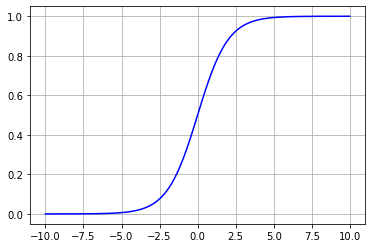

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_l=np.linspace( -10 ,10, 100,  dtype=np.float32)
y_l=1.0 / ( 1 + np.exp( -x_l ) )
plt.plot(x_l, y_l,color='b')
plt.grid(b=True)

### 推导公式：
![title](../images/1.png)

### 回归是如何变成分类的呢?
- 之前在线性回归问题中，得到了具体的回归值，如果此时任务要做一个二分类该怎么处理？如果可以将连续的数值转换成对应的区间，这样就可以完成分类任务了，逻辑回归中借助sigmoid函数完成了。

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

#### 鸢尾花数据集
![title](../images/2.png)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 1、构建模型并预测

In [6]:
from sklearn.linear_model import LogisticRegression

X = iris.data[:, 3:]
Y = (iris.target == 2).astype(np.int)
estimator = LogisticRegression()
estimator.fit(X, Y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
Y_predict_label = estimator.predict(X_new)
Y_proba = estimator.predict_proba(X_new)  # 预测概率值

In [7]:
Y_proba, Y_predict_label

(array([[9.99250016e-01, 7.49984089e-04],
        [9.99240201e-01, 7.59799387e-04],
        [9.99230257e-01, 7.69743043e-04],
        ...,
        [3.08374822e-03, 9.96916252e-01],
        [3.04400296e-03, 9.96955997e-01],
        [3.00476842e-03, 9.96995232e-01]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 2、可视化特征与预测概率之间的关系

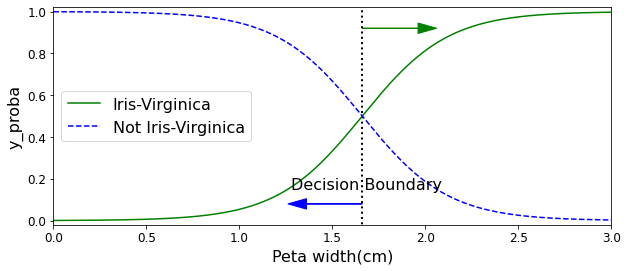

In [8]:
# plt.plot(X_new, Y_proba[:, 1], 'g-', label='iris-Virginica')
# plt.plot(X_new, Y_proba[:, 0], 'b--', label='not iris-Virginica')
# plt.legend()

plt.figure(figsize=(10,4))
decision_boundary = X_new[Y_proba[:,1]>=0.5][0]
plt.plot([decision_boundary,decision_boundary],[-1,2],'k:',linewidth = 2)
plt.plot(X_new,Y_proba[:,1],'g-',label = 'Iris-Virginica')
plt.plot(X_new,Y_proba[:,0],'b--',label = 'Not Iris-Virginica')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width = 0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width = 0.05,head_length=0.1,fc='g',ec='g')
plt.text(decision_boundary+0.02,0.15,'Decision Boundary',fontsize = 16,color = 'k',ha='center')
plt.xlabel('Peta width(cm)',fontsize = 16)
plt.ylabel('y_proba',fontsize = 16)
plt.axis([0,3,-0.02,1.02])
plt.legend(loc = 'center left',fontsize = 16)

### 决策边界的绘制：
- 构建坐标数据，合理的范围当中，根据实际训练时输入数据来决定
- 整合坐标点，得到所有测试输入数据坐标点
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

#### 1、构建棋盘坐标数据

In [9]:
# x0,x1 = np.meshgrid(np.linspace(1,2,2).reshape(-1,1),np.linspace(10,20,3).reshape(-1,1))
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))

#### 2、模型训练

In [10]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)
estimator = LogisticRegression(C = 10000)
estimator.fit(X, y)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = estimator.predict_proba(X_new)

#### 3、绘制等高线，可视化决策边界

Text(6.5, 2.3, 'Vir')

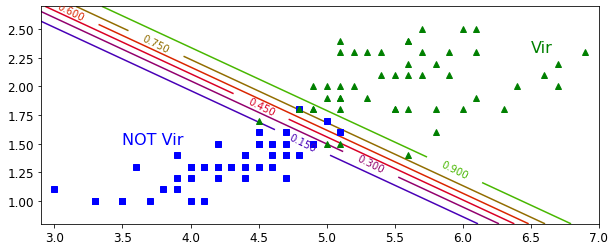

In [11]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)  # 绘制等高线
plt.clabel(contour,inline = 1)
plt.axis([2.9,7,0.8,2.7])
plt.text(3.5,1.5,'NOT Vir',fontsize = 16,color = 'b')
plt.text(6.5,2.3,'Vir',fontsize = 16,color = 'g')

### 多分类
- 如何进行多类别分类呢？Softmax(简单理解就是归一化了)该登场了
![title](../images/3.png)

#### 1、多分类问题模型训练

In [17]:
from matplotlib.colors import ListedColormap
X = iris.data[:, [2, 3]]
Y = iris.target
softmax_estimator = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_estimator.fit(X, Y)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_estimator.predict_proba(X_new)
y_predict = softmax_estimator.predict(X_new)

#### 2、多分类问题决策边界可视化

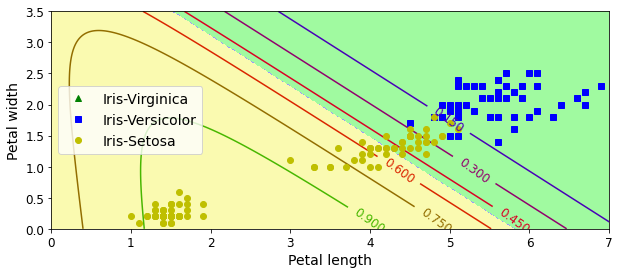

In [18]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()